In [173]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [174]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [223]:
def split_data(data, split_point):
    return data.iloc[:split_point,:].copy(), \
           data.iloc[split_point:,:].copy()

In [176]:
df = pd.read_csv('my_BRENT2019.csv', sep = ',', index_col=[0], parse_dates=[0])
df.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [177]:
df_firsts = df['Значение'].values[1:] - df['Значение'].values[:-1]

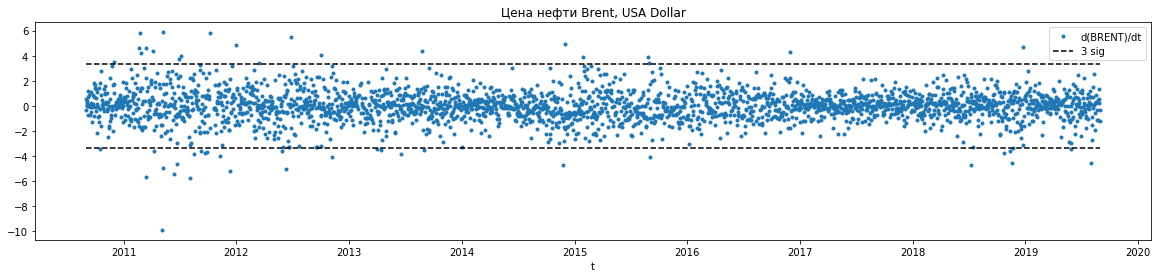

In [178]:
b_sigmas = np.std(df_firsts)**0.5 *3

plt.figure(figsize=(20,4))
plt.plot(df.iloc[:-1].index,df_firsts,'.', label='d(BRENT)/dt')
plt.plot(df.iloc[[0,-1]].index,[b_sigmas, b_sigmas],'--k',label ='3 sig')
plt.plot(df.iloc[[0,-1]].index,[-b_sigmas, -b_sigmas],'--k')
plt.xlabel('t')
plt.legend()
plt.title('Цена нефти Brent, USA Dollar')
plt.show()

Добавим первые разности

In [179]:
df['diffs'] = 0
df['diffs'].values[1:] = df_firsts

In [180]:
df_usd = pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx')
df_usd.head()

,nominal,data,curs,cdx
0,1,2010-09-01,30.8669,Доллар США
1,1,2010-09-02,30.8001,Доллар США
2,1,2010-09-03,30.6858,Доллар США
3,1,2010-09-04,30.6922,Доллар США
4,1,2010-09-07,30.5771,Доллар США


In [181]:
df_usd.index = pd.to_datetime(df_usd['data'].values).date
df_usd.drop(['nominal','cdx','data'], axis=1,inplace = True)
df_usd.rename(columns={'curs':'usd_rate'},inplace=True)
df_usd.head()

,usd_rate
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


In [182]:
df_eur = pd.read_excel('R_E01_09_2010_T01_09_2019.xlsx')
df_eur.head()

,nominal,data,curs,cdx
0,1,2010-09-01,39.0127,Евро
1,1,2010-09-02,39.1654,Евро
2,1,2010-09-03,39.2901,Евро
3,1,2010-09-04,39.3505,Евро
4,1,2010-09-07,39.4720,Евро


In [183]:
df_eur.index = pd.to_datetime(df_eur['data'].values).date
df_eur.drop(['nominal','cdx','data'], axis=1,inplace = True)
df_eur.rename(columns={'curs':'eur_rate'},inplace=True)
df_eur.head()

,eur_rate
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


In [184]:
df = pd.concat([df, df_usd, df_eur], axis=1)
df.head(20)

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,diffs,usd_rate,eur_rate
2010-09-01,76.37,2010.0,9.0,1.0,3.0,244.0,35.0,2.0,0.0,0.0,0.0,0.0,30.8669,39.0127
2010-09-02,76.89,2010.0,9.0,2.0,3.0,245.0,35.0,3.0,0.0,0.0,0.0,0.0,30.8001,39.1654
2010-09-03,76.57,2010.0,9.0,3.0,3.0,246.0,35.0,4.0,0.0,0.0,0.0,0.0,30.6858,39.2901
2010-09-04,76.62,2010.0,9.0,4.0,3.0,247.0,35.0,5.0,0.0,0.0,0.0,0.0,30.6922,39.3505
2010-09-05,76.63,2010.0,9.0,5.0,3.0,248.0,35.0,6.0,0.0,1.0,0.0,0.0,NaN,NaN
2010-09-06,76.87,2010.0,9.0,6.0,3.0,249.0,36.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN
2010-09-07,77.26,2010.0,9.0,7.0,3.0,250.0,36.0,1.0,0.0,0.0,1.0,0.0,30.5771,39.4720
2010-09-08,77.93,2010.0,9.0,8.0,3.0,251.0,36.0,2.0,0.0,0.0,0.0,0.0,30.7319,39.3215
2010-09-09,77.21,2010.0,9.0,9.0,3.0,252.0,36.0,3.0,0.0,0.0,0.0,0.0,30.8873,39.2948
2010-09-10,78.41,2010.0,9.0,10.0,3.0,253.0,36.0,4.0,0.0,0.0,0.0,1.0,30.8801,39.1868


Видимо пустые значения, которые нужно заполнить.   
Для кросс-курсов значения отсутствуют на выходных, когда биржа закрыта. Для нефти - немного непонятно.  
Т.к. это временно ряд, то заполнять будем предыдущими историческими значениями 

In [185]:
df['Значение'].fillna(method='ffill', inplace=True)
df['usd_rate'].fillna(method='ffill', inplace=True)
df['eur_rate'].fillna(method='ffill', inplace=True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3137 entries, 2010-09-01 to 2019-09-01
Data columns (total 14 columns):
Значение           3137 non-null float64
year               2667 non-null float64
month              2667 non-null float64
dayofmonth         2667 non-null float64
quarter            2667 non-null float64
dayofyear          2667 non-null float64
weekofyear         2667 non-null float64
dayofweek          2667 non-null float64
is_holiday         2667 non-null float64
is_prev_holiday    2667 non-null float64
is_next_holiday    2667 non-null float64
diffs              2667 non-null float64
usd_rate           3137 non-null float64
eur_rate           3137 non-null float64
dtypes: float64(14)
memory usage: 367.6 KB


In [187]:
df.head(20)

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,diffs,usd_rate,eur_rate
2010-09-01,76.37,2010.0,9.0,1.0,3.0,244.0,35.0,2.0,0.0,0.0,0.0,0.0,30.8669,39.0127
2010-09-02,76.89,2010.0,9.0,2.0,3.0,245.0,35.0,3.0,0.0,0.0,0.0,0.0,30.8001,39.1654
2010-09-03,76.57,2010.0,9.0,3.0,3.0,246.0,35.0,4.0,0.0,0.0,0.0,0.0,30.6858,39.2901
2010-09-04,76.62,2010.0,9.0,4.0,3.0,247.0,35.0,5.0,0.0,0.0,0.0,0.0,30.6922,39.3505
2010-09-05,76.63,2010.0,9.0,5.0,3.0,248.0,35.0,6.0,0.0,1.0,0.0,0.0,30.6922,39.3505
2010-09-06,76.87,2010.0,9.0,6.0,3.0,249.0,36.0,0.0,1.0,0.0,0.0,0.0,30.6922,39.3505
2010-09-07,77.26,2010.0,9.0,7.0,3.0,250.0,36.0,1.0,0.0,0.0,1.0,0.0,30.5771,39.4720
2010-09-08,77.93,2010.0,9.0,8.0,3.0,251.0,36.0,2.0,0.0,0.0,0.0,0.0,30.7319,39.3215
2010-09-09,77.21,2010.0,9.0,9.0,3.0,252.0,36.0,3.0,0.0,0.0,0.0,0.0,30.8873,39.2948
2010-09-10,78.41,2010.0,9.0,10.0,3.0,253.0,36.0,4.0,0.0,0.0,0.0,1.0,30.8801,39.1868


In [188]:
usd_firsts = df['usd_rate'].values[1:] - df['usd_rate'].values[:-1]

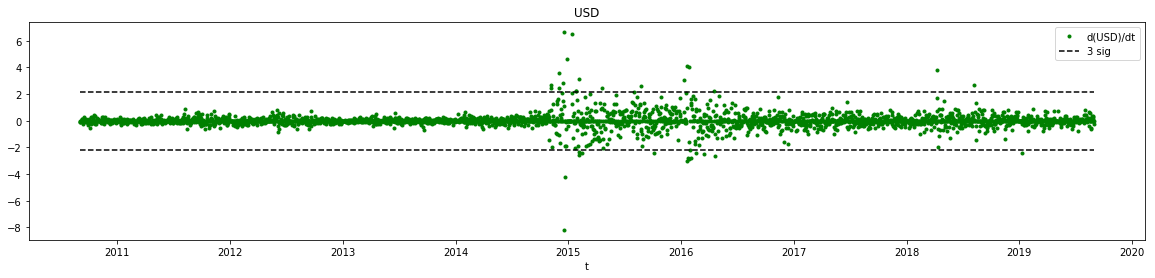

In [189]:
usd_sigmas = np.std(usd_firsts)**0.5 *3

plt.figure(figsize=(20,4))
plt.plot(df.iloc[:-1].index, usd_firsts,'.g', label='d(USD)/dt')
plt.plot(df.iloc[[0,-1]].index,[usd_sigmas, usd_sigmas],'--k', label ='3 sig')
plt.plot(df.iloc[[0,-1]].index,[-usd_sigmas, -usd_sigmas],'--k')
plt.xlabel('t')
plt.legend()
plt.title('USD')
plt.show()

In [190]:
eur_firsts = df['eur_rate'].values[1:] - df['eur_rate'].values[:-1]

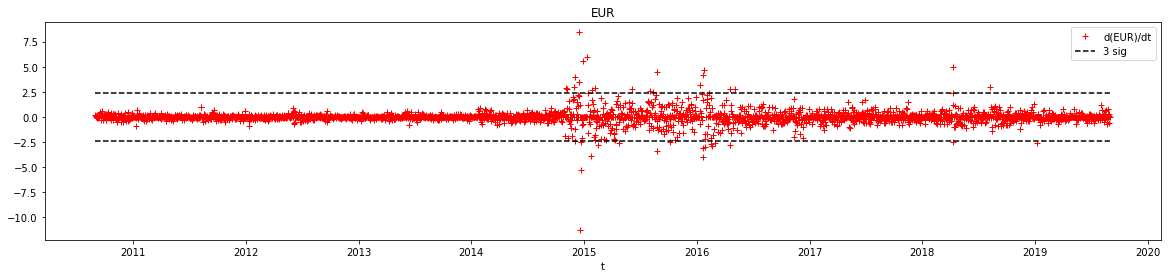

In [191]:
eur_sigmas = np.std(eur_firsts)**0.5 *3

plt.figure(figsize=(20,4))
plt.plot(df.iloc[:-1].index, eur_firsts,'+r', label='d(EUR)/dt')
plt.plot(df.iloc[[0,-1]].index,[eur_sigmas, eur_sigmas],'--k', label ='3 sig')
plt.plot(df.iloc[[0,-1]].index,[-eur_sigmas, -eur_sigmas],'--k')
plt.xlabel('t')
plt.legend()
plt.title('EUR')
plt.show()

Добавим первые разности по кросс-курсам

In [192]:
df['usd_diffs'] = 0
df['usd_diffs'].values[1:] = usd_firsts

In [193]:
df['eur_diffs'] = 0
df['eur_diffs'].values[1:] = eur_firsts

Оставим только первые разности

In [194]:
df = df[['diffs','usd_diffs','eur_diffs']]
df.head()

,diffs,usd_diffs,eur_diffs
2010-09-01,0.0,0,0
2010-09-02,0.0,0,0
2010-09-03,0.0,0,0
2010-09-04,0.0,0,0
2010-09-05,0.0,0,0


Сделаем ресемплинг по неделям

In [196]:
df_w = df.copy().resample('W').mean()
df_w.head()

,diffs,usd_diffs,eur_diffs
2010-09-05,0.000000,0.0,0.0
2010-09-12,0.166667,0.0,0.0
2010-09-19,0.000000,0.0,0.0
2010-09-26,0.000000,0.0,0.0
2010-10-03,0.500000,0.0,0.0


In [206]:
df['diffs'].fillna(value=0, inplace=True)

In [222]:
df.iloc[:, 0]

2010-09-01    0.0
2010-09-02    0.0
2010-09-03    0.0
2010-09-04    0.0
2010-09-05    0.0
             ... 
2019-08-28    0.0
2019-08-29    0.0
2019-08-30   -1.0
2019-08-31    0.0
2019-09-01    0.0
Name: diffs, Length: 3137, dtype: float64

### Разобьём данные на train и test

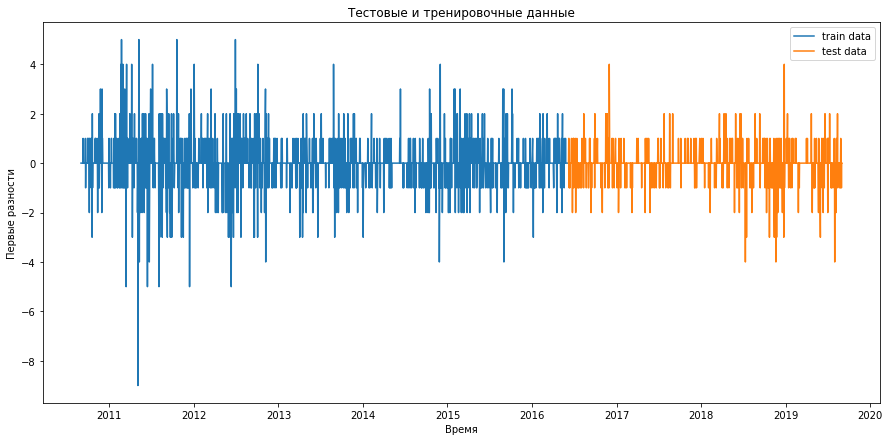

In [226]:
train, test = split_data(df, 2000)

plt.figure(figsize=(15, 7))
plt.xlabel('Время')
plt.ylabel('Первые разности')
plt.plot(train.index,train.iloc[:,0], label='train data')
plt.plot(test.index,test.iloc[:,0], label='test data')
plt.title('Тестовые и тренировочные данные')
plt.legend()
plt.show()

In [227]:
# предсказываем на 1 точку вперёд
X_train = train[['usd_diffs', 'eur_diffs']].iloc[1:]
y_train = train[['diffs']].iloc[:-1]
X_test = test[['usd_diffs', 'eur_diffs']].iloc[1:]
y_test = test[['diffs']].iloc[:-1]

### Создадим и обучим модель

In [228]:
model = GradientBoostingRegressor(max_depth=4, random_state=42, n_estimators=1500)

In [229]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1500, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [230]:
y_pred = model.predict(X_test)

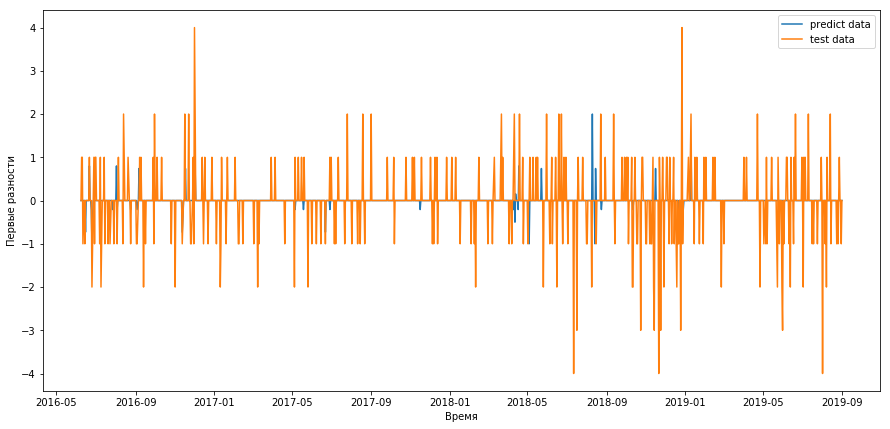

In [231]:
plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('Первые разности')
plt.plot(test.index[1:], y_pred, label='predict data' )
plt.plot(test.index[1:], y_test, label='test data')

plt.legend()
plt.show()

In [232]:
er_g = mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred)

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   inf %


И вот тут я совсем запутался :(